In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

### Data Exploration and Gathering

In [2]:
cbm = pd.read_csv('Conditional_Base_Monitoring in Marine_System.csv')


In [3]:
cbm.head()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,5.14,15,21640.162,1924.358,8516.691,175.324,175.324,706.702,288,640.873,2.072,0.998,10.916,1.026,24.96,0.494,0.951,1
1,9.3,27,72776.229,3560.412,9759.837,645.137,645.137,1060.156,288,774.302,4.511,0.998,22.426,1.051,87.741,1.737,0.982,0.997
2,8.206,24,50994.673,3087.535,9313.854,438.11,438.11,927.728,288,734.474,3.577,0.998,18.412,1.041,60.546,1.199,0.966,0.988
3,5.14,15,21626.805,1924.329,8472.097,175.221,175.221,695.477,288,633.124,2.086,0.998,11.074,1.027,24.549,0.486,0.989,0.991
4,5.14,15,21636.43,1924.313,8494.777,NaN,NaN,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [4]:
cbm.tail()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
12429,9.3,27,72774.292,3560.407,9753.571,644.796,644.796,1055.58,288,772.682,4.519,0.998,22.485,1.051,87.46,1.731,0.987,0.996
12430,6.175,18,29796.511,2307.266,8840.516,246.316,246.316,780.537,288,671.845,2.497,0.998,13.144,1.03,34.498,0.683,0.954,0.991
12431,5.14,15,21625.687,1924.321,8466.713,175.249,175.249,699.706,288,633.775,2.088,0.998,11.132,1.027,24.802,0.491,0.99,0.986
12432,4.161,12,14718.853,1547.451,7728.002,113.727,113.727,631.711,288,603.073,1.663,0.998,8.927,1.023,16.827,0.333,0.99,0.988
12433,2.088,6,3217.569,1350.216,6786.171,23.347,23.347,525.82,288,561.995,1.209,0.998,6.558,1.019,18.305,0.165,0.967,0.98


In [5]:
cbm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12434 entries, 0 to 12433
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Lever position                                            12387 non-null  object
 1   Ship speed (v)                                            12374 non-null  object
 2   Gas Turbine (GT) shaft torque (GTT) [kN m]                12390 non-null  object
 3   GT rate of revolutions (GTn) [rpm]                        12383 non-null  object
 4   Gas Generator rate of revolutions (GGn) [rpm]             12389 non-null  object
 5   Starboard Propeller Torque (Ts) [kN]                      12385 non-null  object
 6   Port Propeller Torque (Tp) [kN]                           12377 non-null  object
 7   Hight Pressure (HP) Turbine exit temperature (T48) [C]    12371 non-null  object
 8   GT Compressor inlet air te

In [6]:
cbm.shape

(12434, 18)

In [7]:
cbm.describe()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,12387,12374,12390,12383,12389,12385,12377,12371,12376,12388,12386,12375,12391,12379,12373,12399,12393,12382
unique,18,20,11442,3899,11844,4296,4295,11781,3,11517,535,4,4217,27,8506,704,53,29
top,4.161,12,289.964,1547.465,7792.63,113.774,113.774,464.006,288,613.851,1.389,0.998,5.947,1.019,0,0.358,0.95,0.975
freq,1423,1421,94,142,97,117,120,93,12353,103,306,12351,100,2090,761,102,671,883


### Data Preprocessing and Cleaning

In [8]:
#Total number of duplicate rows in your dataset and Count duplicates
value = len(cbm[cbm.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  43


In [9]:
#actual duplicate rows and just identify the duplicates
duplicates = cbm[cbm.duplicated()]

In [10]:
print(duplicates)

      Lever position  Ship speed (v)   \
3120            1.138               3   
3977             5.14              15   
5041            4.161              12   
5294            2.088               6   
5499            3.144               9   
5595            2.088               6   
6006             5.14              15   
6151            3.144               9   
6800            4.161              12   
7063            1.138               3   
8278            2.088               6   
8280            4.161              12   
8430            4.161              12   
8488            3.144               9   
8551            3.144               9   
8984            3.144             NaN   
9214             5.14              15   
9415            4.161              12   
9428            4.161              12   
9432            4.161              12   
9582            4.161              12   
9618             5.14              15   
9853            3.144               9   
10067           

In [11]:
# Remove duplicates
cbm_cleaned = cbm.drop_duplicates()

In [12]:
# Save the cleaned dataset
cbm_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [13]:
# Check for missing values
print(cbm.isnull().sum())

Lever position                                              47
Ship speed (v)                                              60
Gas Turbine (GT) shaft torque (GTT) [kN m]                  44
GT rate of revolutions (GTn) [rpm]                          51
Gas Generator rate of revolutions (GGn) [rpm]               45
Starboard Propeller Torque (Ts) [kN]                        49
Port Propeller Torque (Tp) [kN]                             57
Hight Pressure (HP) Turbine exit temperature (T48) [C]      63
GT Compressor inlet air temperature (T1) [C]                58
GT Compressor outlet air temperature (T2) [C]               46
HP Turbine exit pressure (P48) [bar]                        48
GT Compressor inlet air pressure (P1) [bar]                 59
GT Compressor outlet air pressure (P2) [bar]                43
GT exhaust gas pressure (Pexh) [bar]                        55
Turbine Injecton Control (TIC) [%]                          61
Fuel flow (mf) [kg/s]                                  

In [14]:
# Remove rows with missing values
cbm_cleaned = cbm.dropna()4

In [15]:
# Check for any remaining missing values
print("Missing values after dropping rows:")
print(cbm_cleaned.isnull().sum())

Missing values after dropping rows:
Lever position                                              0
Ship speed (v)                                              0
Gas Turbine (GT) shaft torque (GTT) [kN m]                  0
GT rate of revolutions (GTn) [rpm]                          0
Gas Generator rate of revolutions (GGn) [rpm]               0
Starboard Propeller Torque (Ts) [kN]                        0
Port Propeller Torque (Tp) [kN]                             0
Hight Pressure (HP) Turbine exit temperature (T48) [C]      0
GT Compressor inlet air temperature (T1) [C]                0
GT Compressor outlet air temperature (T2) [C]               0
HP Turbine exit pressure (P48) [bar]                        0
GT Compressor inlet air pressure (P1) [bar]                 0
GT Compressor outlet air pressure (P2) [bar]                0
GT exhaust gas pressure (Pexh) [bar]                        0
Turbine Injecton Control (TIC) [%]                          0
Fuel flow (mf) [kg/s]             

In [16]:
# Check the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:")
print(cbm_cleaned.shape)

Shape of the cleaned DataFrame:
(11993, 18)


In [17]:
print(cbm.columns)

Index(['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient '],
      dtype='object')


In [18]:
# Clean up the column names.../'/''/
cbm.columns = cbm.columns.str.strip()

In [19]:
print(cbm.columns)

Index(['Lever position', 'Ship speed (v)',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]',
       'GT rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor inlet air pressure (P1) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'GT exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient',
       'GT Turbine decay state coefficient'],
      dtype='object')


In [20]:
def clean_numeric_column(column):
    # Remove commas and other non-numeric characters except for decimal points
    column = column.replace(',', '', regex=False)  # Remove commas
    column = column.replace('x', '', regex=False)  # Remove any 'x'
    
    # Convert to numeric, coerce errors to NaN
    column = pd.to_numeric(column, errors='coerce')
    return column

In [21]:
# Convert all object columns to numeric
for col in cbm.columns:
    if cbm[col].dtype == 'object':
        cbm[col] = clean_numeric_column(cbm[col])

# Check the data types after conversion
print(cbm.dtypes)

Lever position                                            float64
Ship speed (v)                                            float64
Gas Turbine (GT) shaft torque (GTT) [kN m]                float64
GT rate of revolutions (GTn) [rpm]                        float64
Gas Generator rate of revolutions (GGn) [rpm]             float64
Starboard Propeller Torque (Ts) [kN]                      float64
Port Propeller Torque (Tp) [kN]                           float64
Hight Pressure (HP) Turbine exit temperature (T48) [C]    float64
GT Compressor inlet air temperature (T1) [C]              float64
GT Compressor outlet air temperature (T2) [C]             float64
HP Turbine exit pressure (P48) [bar]                      float64
GT Compressor inlet air pressure (P1) [bar]               float64
GT Compressor outlet air pressure (P2) [bar]              float64
GT exhaust gas pressure (Pexh) [bar]                      float64
Turbine Injecton Control (TIC) [%]                        float64
Fuel flow 

In [22]:
non_numeric = cbm_cleaned[~cbm_cleaned.applymap(lambda x: isinstance(x, (int, float)))]
print(non_numeric)

      Lever position  Ship speed (v)   \
0                5.14              15   
1                 9.3              27   
2               8.206              24   
3                5.14              15   
5               4.161              12   
...               ...             ...   
12429             9.3              27   
12430           6.175              18   
12431            5.14              15   
12432           4.161              12   
12433           2.088               6   

      Gas Turbine (GT) shaft torque (GTT) [kN m]    \
0                                        21640.162   
1                                        72776.229   
2                                        50994.673   
3                                        21626.805   
5                                        14723.428   
...                                            ...   
12429                                    72774.292   
12430                                    29796.511   
12431                

C:\Users\HARIHARASUDHAN\AppData\Local\Temp\ipykernel_9744\68957257.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric = cbm_cleaned[~cbm_cleaned.applymap(lambda x: isinstance(x, (int, float)))]


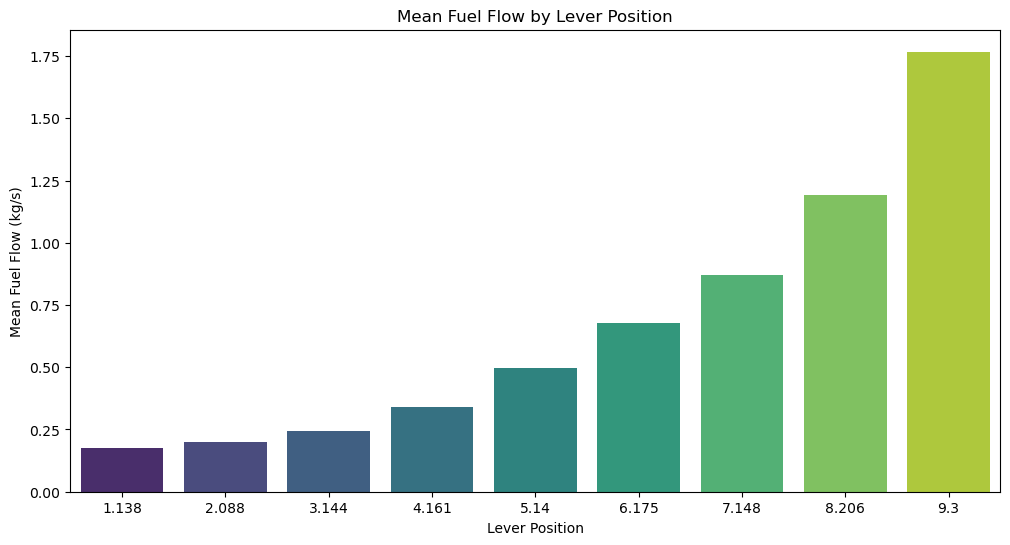

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Lever position' and calculate the mean fuel flow
mean_fuel_flow = cbm.groupby('Lever position')['Fuel flow (mf) [kg/s]'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Lever position', y='Fuel flow (mf) [kg/s]', data=mean_fuel_flow, palette='viridis')
plt.title('Mean Fuel Flow by Lever Position')
plt.xlabel('Lever Position')
plt.ylabel('Mean Fuel Flow (kg/s)')
plt.show()


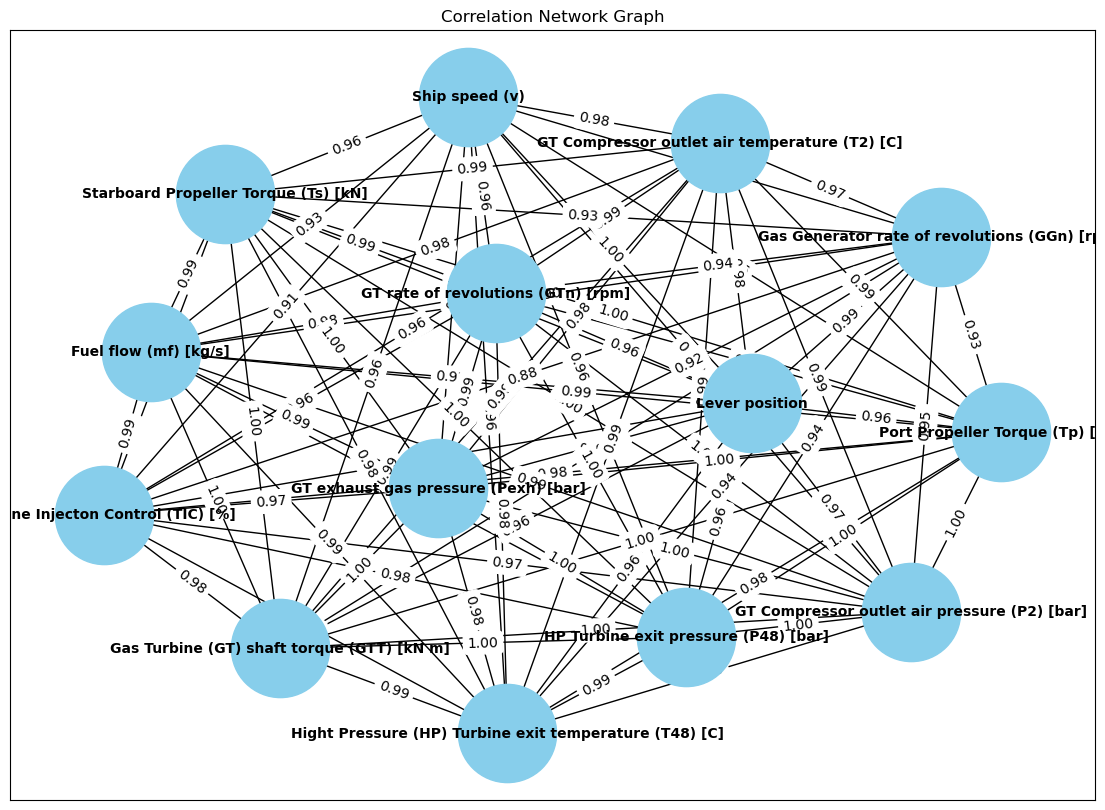

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a network graph from the correlation matrix
G = nx.Graph()
corr = cbm.corr()

# Add nodes and edges to the graph
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.5:  # Threshold to filter strong correlations
            G.add_edge(corr.columns[i], corr.columns[j], weight=corr.iloc[i, j])

# Draw the network graph
pos = nx.spring_layout(G, seed=42)
weights = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(14, 10))
nx.draw_networkx(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{w:.2f}' for u, v, w in G.edges(data='weight')})
plt.title('Correlation Network Graph')
plt.show()


In [25]:
print(cbm.dtypes)

Lever position                                            float64
Ship speed (v)                                            float64
Gas Turbine (GT) shaft torque (GTT) [kN m]                float64
GT rate of revolutions (GTn) [rpm]                        float64
Gas Generator rate of revolutions (GGn) [rpm]             float64
Starboard Propeller Torque (Ts) [kN]                      float64
Port Propeller Torque (Tp) [kN]                           float64
Hight Pressure (HP) Turbine exit temperature (T48) [C]    float64
GT Compressor inlet air temperature (T1) [C]              float64
GT Compressor outlet air temperature (T2) [C]             float64
HP Turbine exit pressure (P48) [bar]                      float64
GT Compressor inlet air pressure (P1) [bar]               float64
GT Compressor outlet air pressure (P2) [bar]              float64
GT exhaust gas pressure (Pexh) [bar]                      float64
Turbine Injecton Control (TIC) [%]                        float64
Fuel flow 

In [26]:
# Check for NaN values in each column
print(cbm.isna().sum())

Lever position                                            71
Ship speed (v)                                            83
Gas Turbine (GT) shaft torque (GTT) [kN m]                68
GT rate of revolutions (GTn) [rpm]                        76
Gas Generator rate of revolutions (GGn) [rpm]             68
Starboard Propeller Torque (Ts) [kN]                      74
Port Propeller Torque (Tp) [kN]                           80
Hight Pressure (HP) Turbine exit temperature (T48) [C]    87
GT Compressor inlet air temperature (T1) [C]              81
GT Compressor outlet air temperature (T2) [C]             71
HP Turbine exit pressure (P48) [bar]                      72
GT Compressor inlet air pressure (P1) [bar]               83
GT Compressor outlet air pressure (P2) [bar]              65
GT exhaust gas pressure (Pexh) [bar]                      80
Turbine Injecton Control (TIC) [%]                        85
Fuel flow (mf) [kg/s]                                     60
GT Compressor decay stat

In [27]:
for col in cbm.columns:
    if cbm[col].dtype == 'object':
        print(f"Unique values in column {col}:")
        print(cbm[col].unique())

In [28]:
for col in cbm.columns:
    print(f"Column {col} data type: {cbm[col].dtype}")
    print(f"Sample data from {col}:")
    print(cbm[col].head())

Column Lever position data type: float64
Sample data from Lever position:
0    5.140
1    9.300
2    8.206
3    5.140
4    5.140
Name: Lever position, dtype: float64
Column Ship speed (v) data type: float64
Sample data from Ship speed (v):
0    15.0
1    27.0
2    24.0
3    15.0
4    15.0
Name: Ship speed (v), dtype: float64
Column Gas Turbine (GT) shaft torque (GTT) [kN m] data type: float64
Sample data from Gas Turbine (GT) shaft torque (GTT) [kN m]:
0    21640.162
1    72776.229
2    50994.673
3    21626.805
4    21636.430
Name: Gas Turbine (GT) shaft torque (GTT) [kN m], dtype: float64
Column GT rate of revolutions (GTn) [rpm] data type: float64
Sample data from GT rate of revolutions (GTn) [rpm]:
0    1924.358
1    3560.412
2    3087.535
3    1924.329
4    1924.313
Name: GT rate of revolutions (GTn) [rpm], dtype: float64
Column Gas Generator rate of revolutions (GGn) [rpm] data type: float64
Sample data from Gas Generator rate of revolutions (GGn) [rpm]:
0    8516.691
1    9759.83

In [29]:
for col in cbm.columns:
    if cbm[col].dtype == 'float64':
        non_numeric = cbm[~cbm[col].apply(lambda x: isinstance(x, (int, float)))]
        if not non_numeric.empty:
            print(f"Non-numeric values in column {col}:")
            print(non_numeric)

In [30]:
def force_convert_to_numeric(column):
    try:
        column = pd.to_numeric(column, errors='coerce')
    except Exception as e:
        print(f"Error converting column: {e}")
    return column

for col in cbm.columns:
    cbm[col] = force_convert_to_numeric(cbm[col])

In [31]:
cbm = cbm.dropna()

In [32]:
cbm.fillna(cbm.mean(), inplace=True)

In [33]:
cbm.fillna(0, inplace=True)  # or any other placeholder

In [34]:
cbm_cleaned = cbm.dropna()

In [35]:
cbm_filled = cbm.fillna(cbm.mean())

In [36]:
cbm_interpolated = cbm.interpolate(method='linear')

In [37]:
cbm_cleaned = cbm_cleaned.astype(float)
print(cbm_cleaned.dtypes)

Lever position                                            float64
Ship speed (v)                                            float64
Gas Turbine (GT) shaft torque (GTT) [kN m]                float64
GT rate of revolutions (GTn) [rpm]                        float64
Gas Generator rate of revolutions (GGn) [rpm]             float64
Starboard Propeller Torque (Ts) [kN]                      float64
Port Propeller Torque (Tp) [kN]                           float64
Hight Pressure (HP) Turbine exit temperature (T48) [C]    float64
GT Compressor inlet air temperature (T1) [C]              float64
GT Compressor outlet air temperature (T2) [C]             float64
HP Turbine exit pressure (P48) [bar]                      float64
GT Compressor inlet air pressure (P1) [bar]               float64
GT Compressor outlet air pressure (P2) [bar]              float64
GT exhaust gas pressure (Pexh) [bar]                      float64
Turbine Injecton Control (TIC) [%]                        float64
Fuel flow 

In [38]:
# Check for NaN values in each column
print(cbm.isna().sum())

Lever position                                            0
Ship speed (v)                                            0
Gas Turbine (GT) shaft torque (GTT) [kN m]                0
GT rate of revolutions (GTn) [rpm]                        0
Gas Generator rate of revolutions (GGn) [rpm]             0
Starboard Propeller Torque (Ts) [kN]                      0
Port Propeller Torque (Tp) [kN]                           0
Hight Pressure (HP) Turbine exit temperature (T48) [C]    0
GT Compressor inlet air temperature (T1) [C]              0
GT Compressor outlet air temperature (T2) [C]             0
HP Turbine exit pressure (P48) [bar]                      0
GT Compressor inlet air pressure (P1) [bar]               0
GT Compressor outlet air pressure (P2) [bar]              0
GT exhaust gas pressure (Pexh) [bar]                      0
Turbine Injecton Control (TIC) [%]                        0
Fuel flow (mf) [kg/s]                                     0
GT Compressor decay state coefficient   

In [39]:
# Fill NaN values with 0 or another value as needed
cbm_filled = cbm.fillna(0)

### Define Target

In [40]:
# Defining features and labels
X = cbm.drop(['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient', 'index'], axis=1, errors='ignore')

y = cbm['GT Compressor decay state coefficient']

### Splliting the Dataset & Model Train and test

In [41]:
# Splitting the dataset using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

### Feature Scalling

In [42]:
# scale features to have zero mean and unit variance using StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


### Model Building and Evaluation

In [43]:
# Creating an instance of a LinearRegression() model named lim
lim = LinearRegression()

In [44]:
# Fitting the lim model with training set
lim.fit(X_train,y_train)

LinearRegression()

In [45]:
# Predicting the y values by using the .predict() function
pred = lim.predict(X_test)

In [46]:

# Printing out the coefficients of the model
print('Coeffiecients: \n',lim.coef_)

Coeffiecients: 
 [ 2.62543620e-01 -7.70158597e-02 -3.47261850e-07 -2.74710904e-05
  3.11012143e-05 -5.59201291e-04 -5.59201291e-04 -1.12315671e-06
 -1.31838984e-16 -3.39999410e-03  1.81120622e-01  1.11022302e-16
  1.43796653e-02  8.55882331e-01 -7.10186881e-04  2.20528383e-01]


In [47]:
# Recerating the coefficients of the model as dataframe
coeffecients = pd.DataFrame(lim.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Lever position,2.625436e-01
Ship speed (v),-7.701586e-02
Gas Turbine (GT) shaft torque (GTT) [kN m],-3.472619e-07
GT rate of revolutions (GTn) [rpm],-2.747109e-05
Gas Generator rate of revolutions (GGn) [rpm],3.110121e-05
Starboard Propeller Torque (Ts) [kN],-5.592013e-04
Port Propeller Torque (Tp) [kN],-5.592013e-04
Hight Pressure (HP) Turbine exit temperature (T48) [C],-1.123157e-06
GT Compressor inlet air temperature (T1) [C],-1.318390e-16
GT Compressor outlet air temperature (T2) [C],-3.399994e-03


In [48]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2 score:', metrics.r2_score(y_test, pred))

RMSE: 0.005855594463636355
R2 score: 0.8437635074319352


Text(0, 0.5, 'Predicted Y')

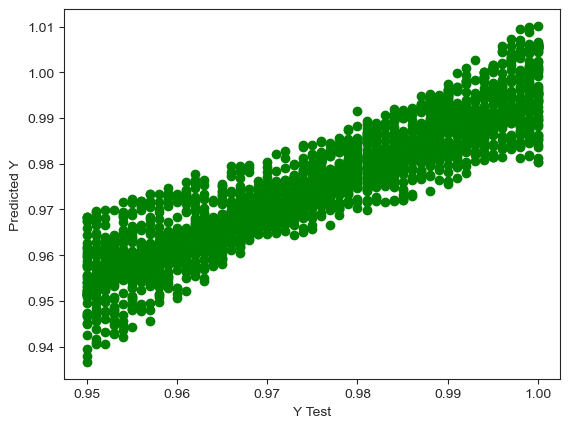

In [49]:
# Creatinng a scatterplot of the y_test values vs the predicted y_test values
sns.set_style('ticks')
plt.scatter(y_test,pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [50]:
# Calculate residuals
residuals = y_test - pred

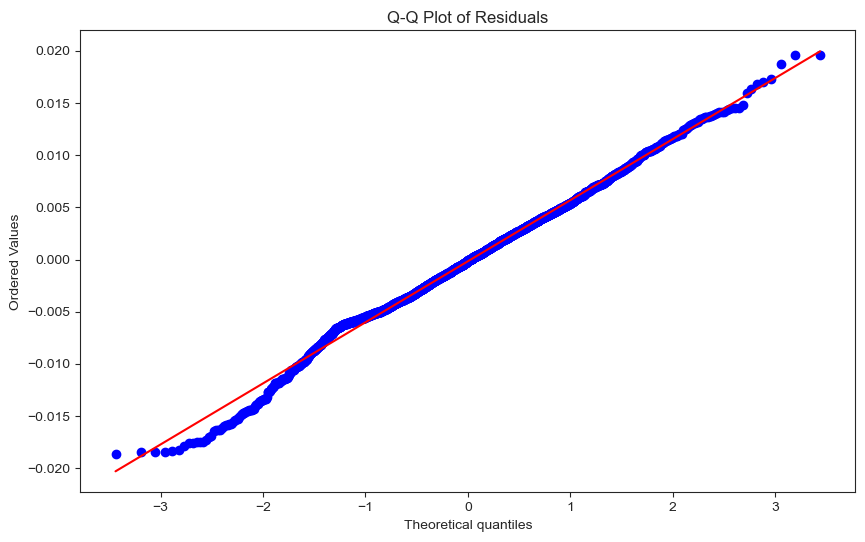

In [51]:

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [52]:
# Let's define a function for the multiple regression
def linear_Regression(x,y):
    
    x = sm.add_constant(x)
    
    # defining the model, fitting the model and printing the model summary
    sm_model = sm.OLS(y,x).fit()
    print(sm_model.summary())

In [53]:
# Calling the linear regression function
linear_Regression(X,y)

                                      OLS Regression Results                                     
Dep. Variable:     GT Compressor decay state coefficient   R-squared:                       0.843
Model:                                               OLS   Adj. R-squared:                  0.843
Method:                                    Least Squares   F-statistic:                     4946.
Date:                                   Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                                           18:44:05   Log-Likelihood:                 44522.
No. Observations:                                  11951   AIC:                        -8.902e+04
Df Residuals:                                      11937   BIC:                        -8.891e+04
Df Model:                                             13                                         
Covariance Type:                               nonrobust                                         
                    

In [54]:
X.head()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s]
0,5.140,15.0,21640.162,1924.358,8516.691,175.324,175.324,706.702,288.0,640.873,2.072,0.998,10.916,1.026,24.960,0.494
1,9.300,27.0,72776.229,3560.412,9759.837,645.137,645.137,1060.156,288.0,774.302,4.511,0.998,22.426,1.051,87.741,1.737
2,8.206,24.0,50994.673,3087.535,9313.854,438.110,438.110,927.728,288.0,734.474,3.577,0.998,18.412,1.041,60.546,1.199
3,5.140,15.0,21626.805,1924.329,8472.097,175.221,175.221,695.477,288.0,633.124,2.086,0.998,11.074,1.027,24.549,0.486
5,4.161,12.0,14723.428,1547.467,7790.899,113.778,113.778,644.315,288.0,609.087,1.657,0.998,8.901,1.022,17.334,0.343


In [55]:
X = X.drop(['Gas Turbine (GT) shaft torque (GTT) [kN m]','Hight Pressure (HP) Turbine exit temperature (T48) [C]'], axis = 1)

In [56]:
# Calling the linear_Regression function
linear_Regression(X,y)

                                      OLS Regression Results                                     
Dep. Variable:     GT Compressor decay state coefficient   R-squared:                       0.843
Model:                                               OLS   Adj. R-squared:                  0.843
Method:                                    Least Squares   F-statistic:                     5843.
Date:                                   Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                                           18:44:05   Log-Likelihood:                 44519.
No. Observations:                                  11951   AIC:                        -8.901e+04
Df Residuals:                                      11939   BIC:                        -8.893e+04
Df Model:                                             11                                         
Covariance Type:                               nonrobust                                         
                    

In [57]:
X.head()

,Lever position,Ship speed (v),GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s]
0,5.140,15.0,1924.358,8516.691,175.324,175.324,288.0,640.873,2.072,0.998,10.916,1.026,24.960,0.494
1,9.300,27.0,3560.412,9759.837,645.137,645.137,288.0,774.302,4.511,0.998,22.426,1.051,87.741,1.737
2,8.206,24.0,3087.535,9313.854,438.110,438.110,288.0,734.474,3.577,0.998,18.412,1.041,60.546,1.199
3,5.140,15.0,1924.329,8472.097,175.221,175.221,288.0,633.124,2.086,0.998,11.074,1.027,24.549,0.486
5,4.161,12.0,1547.467,7790.899,113.778,113.778,288.0,609.087,1.657,0.998,8.901,1.022,17.334,0.343


In [58]:
# Remove any extra spaces or tab characters from column names
X.columns = X.columns.str.strip()

# Get the interaction terms by multiplying values
aa = X['Ship speed (v)'] * X['Lever position']
bb = X['Port Propeller Torque (Tp) [kN]'] * X['Starboard Propeller Torque (Ts) [kN]']
cc = X['HP Turbine exit pressure (P48) [bar]'] * X['GT rate of revolutions (GTn) [rpm]']
dd = X['HP Turbine exit pressure (P48) [bar]'] * X['Starboard Propeller Torque (Ts) [kN]']
ee = X['HP Turbine exit pressure (P48) [bar]'] * X['Port Propeller Torque (Tp) [kN]']
ff = X['GT Compressor outlet air pressure (P2) [bar]'] * X['Starboard Propeller Torque (Ts) [kN]']
gg = X['GT Compressor outlet air pressure (P2) [bar]'] * X['Port Propeller Torque (Tp) [kN]']
hh = X['GT Compressor outlet air pressure (P2) [bar]'] * X['GT rate of revolutions (GTn) [rpm]']
ii = X['GT Compressor outlet air pressure (P2) [bar]'] * X['HP Turbine exit pressure (P48) [bar]']
jj = X['GT exhaust gas pressure (Pexh) [bar]'] * X['Port Propeller Torque (Tp) [kN]']
kk = X['GT exhaust gas pressure (Pexh) [bar]'] * X['Starboard Propeller Torque (Ts) [kN]']
ll = X['GT exhaust gas pressure (Pexh) [bar]'] * X['HP Turbine exit pressure (P48) [bar]']
mm = X['GT exhaust gas pressure (Pexh) [bar]'] * X['GT Compressor outlet air pressure (P2) [bar]']


In [59]:
# Adding these interactions terms to dataset using .concat() function of pandas
# We will call this dataset as interaction

interaction = pd.concat([X,aa,bb,cc,dd,ee,ff,gg,hh,ii,jj,ll,mm,kk],axis=1)

# Change column names of this interaction terms
interaction = interaction.rename(columns = {0:'aa',1:'bb',2:'cc',3:'dd',4:'ee',5:'ff',6:'gg',7:'hh',8:'ii',9:'jj',
                                            10:'ll',11:'mm',12:'kk'})

interaction.head()

,Lever position,Ship speed (v),GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],...,dd,ee,ff,gg,hh,ii,jj,ll,mm,kk
0,5.140,15.0,1924.358,8516.691,175.324,175.324,288.0,640.873,2.072,0.998,...,363.271328,363.271328,1913.836784,1913.836784,21006.291928,22.617952,179.882424,2.125872,11.199816,179.882424
1,9.300,27.0,3560.412,9759.837,645.137,645.137,288.0,774.302,4.511,0.998,...,2910.213007,2910.213007,14467.842362,14467.842362,79845.799512,101.163686,678.038987,4.741061,23.569726,678.038987
2,8.206,24.0,3087.535,9313.854,438.110,438.110,288.0,734.474,3.577,0.998,...,1567.119470,1567.119470,8066.481320,8066.481320,56847.694420,65.859724,456.072510,3.723657,19.166892,456.072510
3,5.140,15.0,1924.329,8472.097,175.221,175.221,288.0,633.124,2.086,0.998,...,365.511006,365.511006,1940.397354,1940.397354,21310.019346,23.100364,179.951967,2.142322,11.372998,179.951967
5,4.161,12.0,1547.467,7790.899,113.778,113.778,288.0,609.087,1.657,0.998,...,188.530146,188.530146,1012.737978,1012.737978,13774.003767,14.748957,116.281116,1.693454,9.096822,116.281116


In [60]:
# Now let's fit this model to the Linear regression function

linear_Regression(interaction,y)

                                      OLS Regression Results                                     
Dep. Variable:     GT Compressor decay state coefficient   R-squared:                       0.934
Model:                                               OLS   Adj. R-squared:                  0.934
Method:                                    Least Squares   F-statistic:                     8103.
Date:                                   Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                                           18:44:05   Log-Likelihood:                 49729.
No. Observations:                                  11951   AIC:                        -9.941e+04
Df Residuals:                                      11929   BIC:                        -9.925e+04
Df Model:                                             21                                         
Covariance Type:                               nonrobust                                         
                    

### Anamoly 
#### Added IsolationForest from scikit-learn to detect anomalies in the dataset.
#### Plotted the distribution of a specific feature (Ship speed (v)) to visualize the detected anomalies.

In [61]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Select relevant features
features = cbm[['Lever position', 'Ship speed (v)', 'Gas Turbine (GT) shaft torque (GTT) [kN m]', 'GT rate of revolutions (GTn) [rpm]', 'Gas Generator rate of revolutions (GGn) [rpm]', 'Starboard Propeller Torque (Ts) [kN]', 'Port Propeller Torque (Tp) [kN]', 'Hight Pressure (HP) Turbine exit temperature (T48) [C]', 'GT Compressor outlet air temperature (T2) [C]', 'HP Turbine exit pressure (P48) [bar]', 'GT Compressor outlet air pressure (P2) [bar]', 'GT exhaust gas pressure (Pexh) [bar]', 'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]']]




In [62]:
# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)



In [63]:
# Fit the model
iso_forest.fit(features)



IsolationForest(contamination=0.01, random_state=42)

In [64]:
# Predict anomalies
cbm['anomaly'] = iso_forest.predict(features)



In [65]:
# Identify anomalies
anomalies = cbm[cbm['anomaly'] == -1]
print(f'Number of anomalies detected: {len(anomalies)}')

Number of anomalies detected: 120


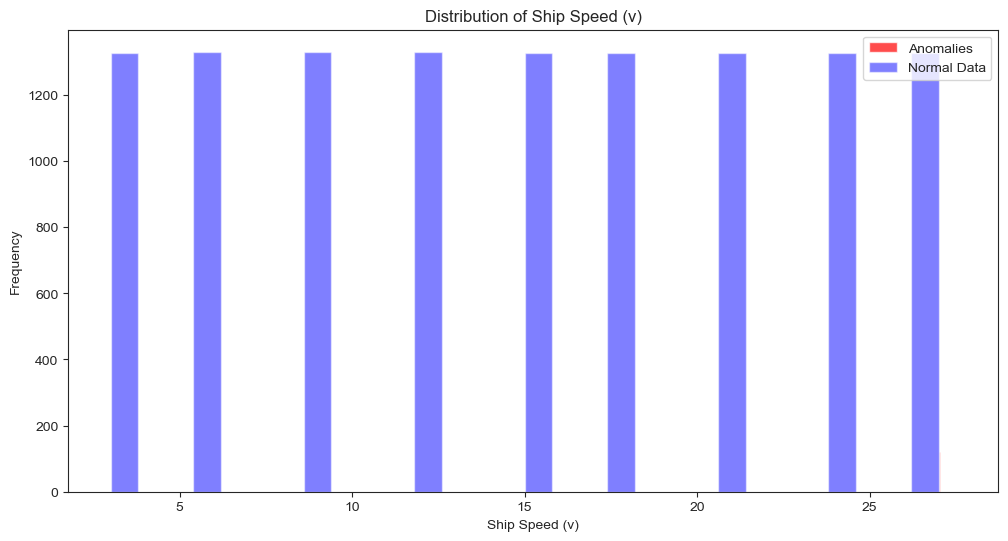

In [66]:
import matplotlib.pyplot as plt

# Plot distribution of a specific feature for anomalies
plt.figure(figsize=(12, 6))
plt.hist(anomalies['Ship speed (v)'], bins=30, alpha=0.7, color='red', label='Anomalies')
plt.hist(cbm['Ship speed (v)'], bins=30, alpha=0.5, color='blue', label='Normal Data')
plt.xlabel('Ship Speed (v)')
plt.ylabel('Frequency')
plt.title('Distribution of Ship Speed (v)')
plt.legend()
plt.show()


In [67]:
# Display the first few rows of anomalies for examination
print(anomalies.head())


     Lever position  Ship speed (v)  \
180             9.3            27.0   
187             9.3            27.0   
221             9.3            27.0   
455             9.3            27.0   
755             9.3            27.0   

     Gas Turbine (GT) shaft torque (GTT) [kN m]  \
180                                   72775.755   
187                                   72758.560   
221                                   72767.604   
455                                   72755.195   
755                                   72760.413   

     GT rate of revolutions (GTn) [rpm]  \
180                            3560.398   
187                            3560.360   
221                            3560.389   
455                            3560.355   
755                            3560.371   

     Gas Generator rate of revolutions (GGn) [rpm]  \
180                                       9746.163   
187                                       9725.702   
221                                  

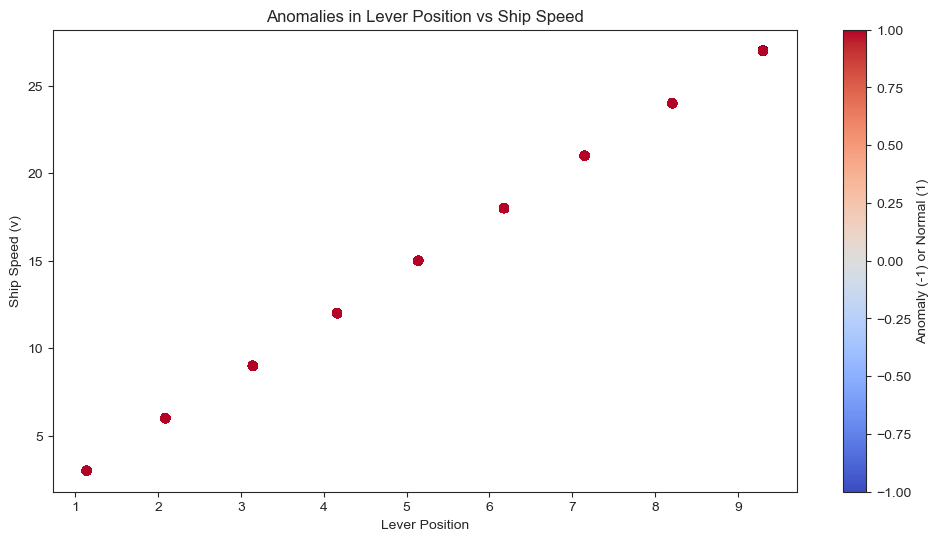

In [68]:
plt.figure(figsize=(12, 6))
plt.scatter(cbm['Lever position'], cbm['Ship speed (v)'], c=cbm['anomaly'], cmap='coolwarm', marker='o')
plt.title('Anomalies in Lever Position vs Ship Speed')
plt.xlabel('Lever Position')
plt.ylabel('Ship Speed (v)')
plt.colorbar(label='Anomaly (-1) or Normal (1)')
plt.show()


### Using XGBOOST 

In [69]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBRegressor
xgb_model = XGBRegressor()

In [70]:
# Clean column names by replacing special characters and spaces
X_train.columns = X_train.columns.str.replace(r'[^\w\s]', '', regex=True)
X_train.columns = X_train.columns.str.strip().str.replace(' ', '_')

X_test.columns = X_test.columns.str.replace(r'[^\w\s]', '', regex=True)
X_test.columns = X_test.columns.str.strip().str.replace(' ', '_')


In [71]:
# Fit the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]


In [73]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lim, X, y, cv=5, scoring='r2')
print(f'Cross-validation R2 scores: {cv_scores}')


Cross-validation R2 scores: [0.84427774 0.83152893 0.85267697 0.84118046 0.84382813]


### Hyper Parameter Turing (Using Gridsearch)

In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}


In [75]:
# Ensure column names are strings if using a DataFrame
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [76]:
# Remove special characters from feature names
X_train.columns = X_train.columns.str.replace('[\[\]<]', '', regex=True)


In [77]:
# Create GridSearchCV object
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='r2')

try:
    grid_search.fit(X_train, y_train)
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Best score: {grid_search.best_score_}')
except ValueError as e:
    print(f'Error during GridSearchCV: {e}')

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.9914323159887865


In [78]:
#Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.9914323159887865


In [79]:
# Using the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 score: {r2}')

RMSE: 0.0012233760626445566
R2 score: 0.9931803756178262


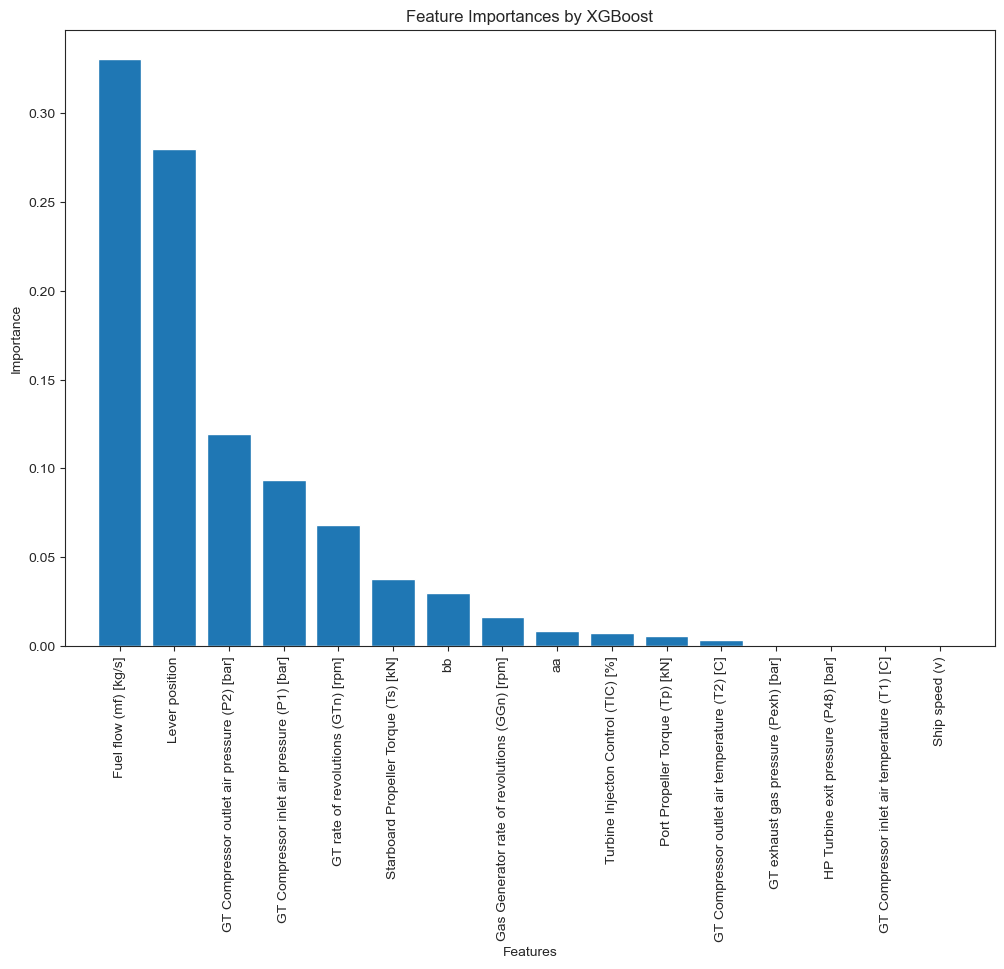

In [80]:
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances by XGBoost')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [interaction.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## THANK YOU :)